# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')
df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


In [78]:
df.shape

(7203, 7)

Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [79]:
# Verificando os tipos de dados
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

Todos os dados estão no formato correto

In [80]:
# Verificando a quantidade de valores nulos
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

Nenhum coluna tem dados faltantes

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [81]:
# Verificando describe
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


Alguns valores estão muito distantes da média e dos 75% podendo indicar outiliers, como a coluna do aluguel.

Mesmo se forem valores corretos é importante verificar.

In [82]:
# Criando os gráficos boxplot
fig1 = px.box(df, y='Valor_Aluguel')
fig2 = px.box(df, y='Valor_Condominio')
fig3 = px.box(df, y='Metragem')

# Criando uma figura com subplots
fig = make_subplots(rows=1, cols=3)

# Adicionando os gráficos à figura
fig.add_trace(go.Box(y=df['Valor_Aluguel'], name='Valor Aluguel'), row=1, col=1)
fig.add_trace(go.Box(y=df['Valor_Condominio'], name='Valor Condominio'), row=1, col=2)
fig.add_trace(go.Box(y=df['Metragem'], name='Metragem'), row=1, col=3)

# Atualizando o layout da figura
fig.update_layout(title_text='Boxplots')

# Exibindo a figura
fig.show()

Há muitos valores considerados outliers, vamos verificar como como elas se relacionam para poder decidir como elas serão tratadas  

In [83]:
# Valor de Aluguel 
limiteSuperior = 5900

print("Porcentagem de registros onde Valor Aluguel > Limite Superior:",
      (len(df[df['Valor_Aluguel'] > limiteSuperior]) / len(df)) * 100)

# Visualizando as ocorrencias onde Valor_Aluguel > Limite Superior
df[df['Valor_Aluguel'] > limiteSuperior]

Porcentagem de registros onde Valor Aluguel > Limite Superior: 10.398445092322643


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6454,5990,1188,164,3,5,3,3
6455,5999,1400,175,4,4,1,2
6456,6000,800,150,3,4,3,2
6457,6000,0,152,2,2,1,1
6458,6000,1100,43,1,2,1,1
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


In [84]:
# Valor de Condominio 
limiteSuperior = 1854

print("Porcentagem de registros onde Valor Condominio > Limite Superior:",
      (len(df[df['Valor_Condominio'] > limiteSuperior]) / len(df)) * 100)

# Visualizando as ocorrencias onde Valor_Condominio > Limite Superior
df[df['Valor_Condominio'] > limiteSuperior]

Porcentagem de registros onde Valor Condominio > Limite Superior: 8.135499097598222


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
1649,1300,2435,208,4,3,2,3
2083,1400,1966,30,1,1,0,1
2156,1500,2893,230,3,2,1,2
2492,1500,2893,230,3,2,1,2
2753,1600,1900,30,1,1,0,1
...,...,...,...,...,...,...,...
7197,25000,5636,327,4,3,2,3
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7


In [85]:
# Valor de Metragem 
limiteSuperior = 172

print("Porcentagem de registros onde Valor Metragem > Limite Superior:",
      (len(df[df['Metragem'] > limiteSuperior]) / len(df)) * 100)

# Visualizando as ocorrencias onde Metragem > Limite Superior
df[df['Metragem'] > limiteSuperior]

Porcentagem de registros onde Valor Metragem > Limite Superior: 8.982368457587118


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
1649,1300,2435,208,4,3,2,3
2156,1500,2893,230,3,2,1,2
2492,1500,2893,230,3,2,1,2
2989,1700,0,250,3,2,1,0
3525,1900,2200,225,4,2,1,3
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


In [86]:
# Juntando os dados de Valor_Aluguel, Valor_Condominio e Metragem onde eles são maiores que o limite superior
df_outliers = df[(df['Valor_Aluguel'] > 5900) | (df['Valor_Condominio'] > 1854) | (df['Metragem'] > 172)]

print("Porcentagem de todos os outliers juntos:",
      (len(df_outliers) / len(df)) * 100)

Porcentagem de todos os outliers juntos: 14.618908788004997


Porcentagem dos outliers:

- 10 % do 'Valor_Aluguel' são outliers
- 8% da coluna 'Valor_Condominio' são outliers
- 8% dos dados de metragem são outliers. 

E juntando todas as instancias de outliers, apenas **14%** dos dados são de outliers.

Como existem locais com esses valores mais altos de aluguel, condominio e metragem, optei por apenas remover os dados que estão na metade superior do limite superior de cada instancia, a conta foi feita da seguinte forma: 
* corte = ( Limite Superior + Valor Máximo ) / 2 
* df = df[df['coluna_com_outlier'] <= corte]

In [87]:
# Definição dos valores
limite_superior_aluguel = 5900
max_aluguel = 25000

limite_superior_condominio = 1854
max_condominio = 9500

limite_superior_metragem = 172
max_metragem = 880

# Cálculo do corte
corte_aluguel = (limite_superior_aluguel + max_aluguel) / 2
corte_condominio = (limite_superior_condominio + max_condominio) / 2
corte_metragem = (limite_superior_metragem + max_metragem) / 2

df = df[
    (df['Valor_Aluguel'] <= corte_aluguel) & 
    (df['Valor_Condominio'] <= corte_condominio) & 
    (df['Metragem'] <= corte_metragem)
]

df.shape

(7116, 7)

Analise Bivariada

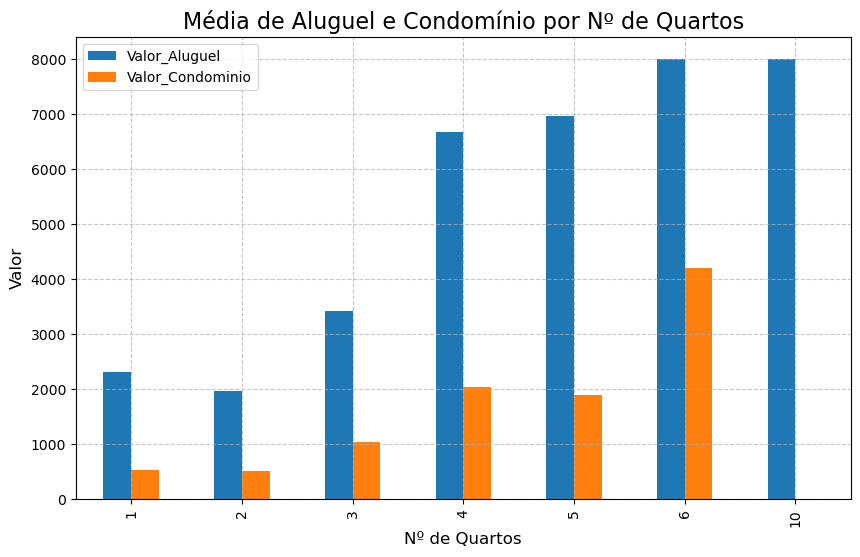

In [88]:
# Gráfico de barras para a médoa de valor do condominio e a média de valor do aluguel
media_aluguel_condominio = df.groupby('N_Quartos')[['Valor_Aluguel', 'Valor_Condominio']].mean()

media_aluguel_condominio.plot(kind='bar', figsize=(10, 6))
plt.title('Média de Aluguel e Condomínio por Nº de Quartos', fontsize=16)
plt.xlabel('Nº de Quartos', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Aqui notamos que quanto mais quartos tem a casa, maior é o valor de alguel e o valor do condomínio.

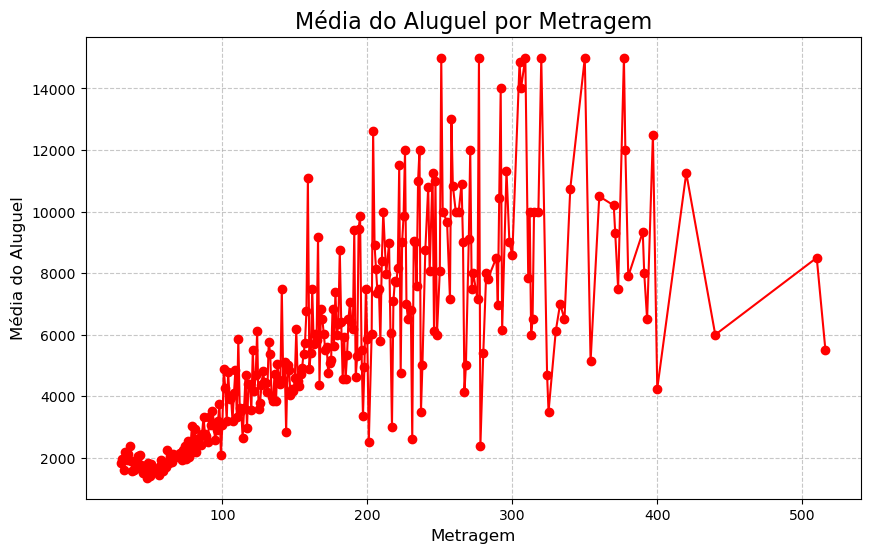

In [89]:
# Calculando a média do alguel para cadam metragem
media_alguel_metragem = df.groupby('Metragem')['Valor_Aluguel'].mean()

# Ordenando em ordem crescente
media_alguel_metragem = media_alguel_metragem.sort_index()

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(media_alguel_metragem.index, media_alguel_metragem, marker='o', color='red')


# Adicionando as legendas dos rótulos
plt.title('Média do Aluguel por Metragem', fontsize=16)
plt.xlabel('Metragem', fontsize=12)
plt.ylabel('Média do Aluguel', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Mesmo com bastante ruído, podemos notar uma tendencia de que quando maior a metragem maior será o aluguel.

In [90]:
df.columns

Index(['Valor_Aluguel', 'Valor_Condominio', 'Metragem', 'N_Quartos',
       'N_banheiros', 'N_Suites', 'N_Vagas'],
      dtype='object')

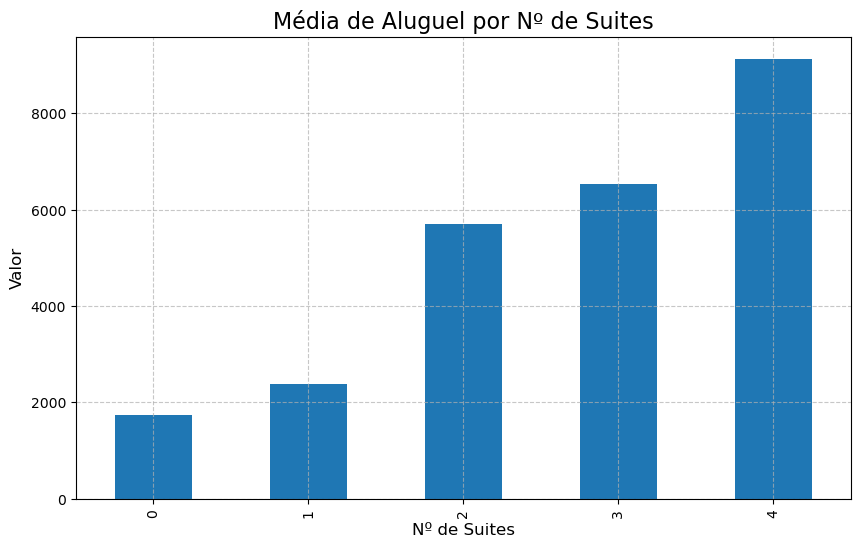

In [91]:
# Gráfico de barras para a média de valor do aluguel por númeor de suites
media_aluguel_condominio = df.groupby('N_Suites')['Valor_Aluguel'].mean()

media_aluguel_condominio.plot(kind='bar', figsize=(10, 6))
plt.title('Média de Aluguel por Nº de Suites', fontsize=16)
plt.xlabel('Nº de Suites', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Memso não sendo tão direta, o número de suites mostra que tem ligação com o valor do aluguel, só não mostrou a mesma relação no número de suites igual a 4, mas isso pode se dar pelas outras instancias, como a metragem.

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




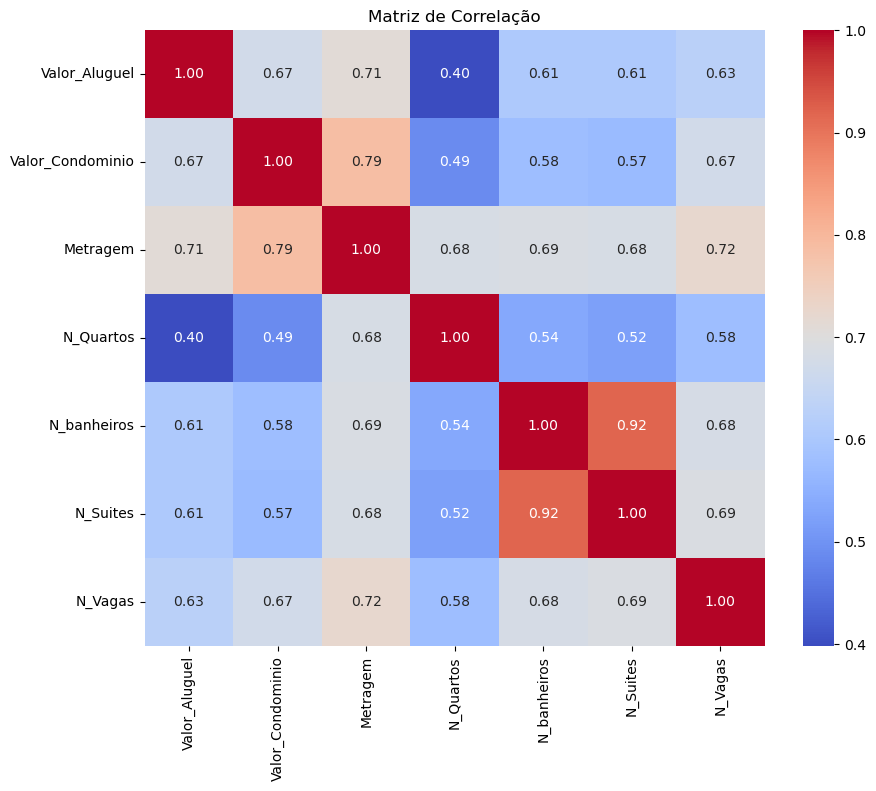

In [92]:
#Seu código aqui
# Cluster Map
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

As variáveis com maior correlação são número de banheiros com o número de suites, o que já era esperado uma vez que sempre que uma aumenta a outra irá aumentar também. 

Porém para a nossa variavel que irá ser predita, as maiores correlações são com:
- Valor Condominio
- Metragem
- Número de Vagas
- Número de Banheiros


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [93]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [ ]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [95]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)


In [96]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
regressao_simples = LinearRegression()
regressao_simples.fit(X,y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [97]:
#Seu código Aqui
print(f'Intercept: {regressao_simples.intercept_} \nCoef: {regressao_simples.coef_}')

Intercept: 187.8978275408449 
Coef: [30.01404508]


Nossa equação seria:  580.85* Aluguel + 21.35

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [98]:
# Calculando R quadrado
r2 = regressao_simples.score(X, y)
print(f'R^2: {r2}')

R^2: 0.5001918417240504


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

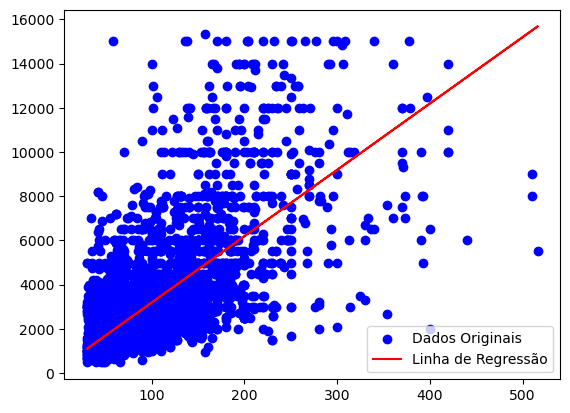

In [99]:
# Seu código aqui
# Plotar os dados originais
plt.scatter(X, y, color='blue', label='Dados Originais')

# Plotar a linha de regressão
plt.plot(X, regressao_simples.predict(X), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [100]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [101]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_simples.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_simples.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5128679410243122


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

O valor foi relativamente baixo para os dados de treino, porém foi melhor nos dados de teste, isso pode ser explicado por ser uma regressão linear simples, com somente uma variavel, podendo nao ser o suficiente para captar toda a relação com o aluguel.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [106]:
# Separando os dados
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

# Dividindo em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [107]:
#seu código aqui
regressao_multipla = LinearRegression()
regressao_multipla.fit(X_train, y_train)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [ ]:
# Calculando R quadrado
r2 = regressao_multipla.score(X_train, y_train)
print("Coeficiente de Determinação (R²) nos Dados de Treino:", r2)

Coeficiente de Determinação (R²) nos Dados de Treino: 0.5821895187491434


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [111]:
# Calculando R quadrado
r2 = regressao_multipla.score(X_test, y_test)
print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.5905379861469613


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Apesar de ter tido uma mellhora significativa do multipla para o simples, o aumento não foi tão significativo, quase 8% de aumento nas métricas de treino e teste.